In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import os
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [32]:
# Read sample_superstore.csv
df = pd.read_csv('sample_superstore.csv', sep= ',')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Convert the 'Order Date' column to datetime format
df['Order Date']= pd.to_datetime(df['Order Date'])

# Check the format of 'Order Date Date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
# Convert the 'Ship Date' column to datetime format
df['Ship Date']= pd.to_datetime(df['Ship Date'])

# Check the format of 'Ship Date Date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
# rename columns for a better readablity & compatibility with the database column names
df.columns = [x.lower().replace(" ","_").replace("-","_") for x in df.columns]

In [6]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# create a new DataFrame from grouping the customers based on their ID and summing the Sales column:
df_monetary = df.groupby('customer_id')['sales'].sum()
df_monetary = df_monetary.reset_index()
df_monetary.head()

,customer_id,sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [8]:
# calculating the frequency
df_frequency = df.groupby('customer_id')['order_id'].nunique()
df_frequency = df_frequency.reset_index()
df_frequency.head()

,customer_id,order_id
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3


In [9]:
# calculating recency
# For our recency calculations, we're using our most recent purchase date as 
latest_date = df['order_date'].max()
print(latest_date)

2017-12-30 00:00:00


In [10]:
 # 1.1 - Create RFM scores by aggregating Customer ID and using 3 separate lambda functions to form a new dataframe (RFMdf)
# R is established with the difference between the current date (latest_date) and the customer ID's most recent date of purchase
# F is the number of purchases each customer ID has made, or the count of records each customer ID has in the database
# M is the sum of sales contributed by each customer ID
RFMdf = df.groupby('customer_id').agg(
    Recency = ('order_date', lambda x: (latest_date - x.max()).days), 
    Frequency = ('order_id', 'count'), 
    Monetary = ('sales', 'sum') 
)

In [11]:
RFMdf.head()

,Recency,Frequency,Monetary
customer_id,,,
AA-10315,184,11,5563.560
AA-10375,19,15,1056.390
AA-10480,259,12,1790.512
AA-10645,55,18,5086.935
AB-10015,415,6,886.156


In [12]:
RFMdf.info()



<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    793 non-null    int64  
 1   Frequency  793 non-null    int64  
 2   Monetary   793 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 24.8+ KB


In [13]:
RFMdf.describe()

,Recency,Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,146.802018,12.602774,2896.848500
std,186.211051,6.242559,2628.670117
min,0.000000,1.000000,4.833000
25%,30.000000,8.000000,1146.050000
50%,75.000000,12.000000,2256.394000
75%,183.000000,16.000000,3785.276000
max,1165.000000,37.000000,25043.050000


In [14]:
RFMdf.reset_index()

,customer_id,Recency,Frequency,Monetary
0,AA-10315,184,11,5563.560
1,AA-10375,19,15,1056.390
2,AA-10480,259,12,1790.512
3,AA-10645,55,18,5086.935
4,AB-10015,415,6,886.156
...,...,...,...,...
788,XP-21865,43,28,2374.658
789,YC-21895,4,8,5454.350
790,YS-21880,9,12,6720.444
791,ZC-21910,54,31,8025.707


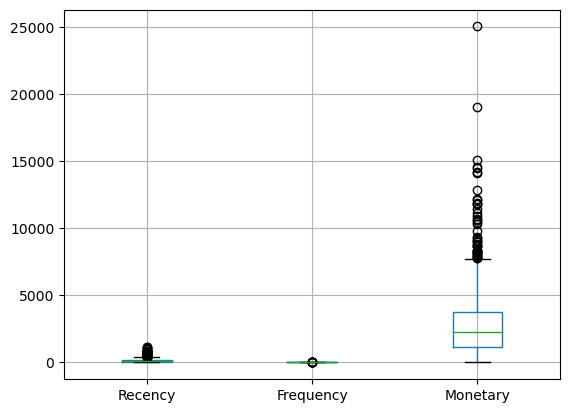

In [15]:
RFMdf.boxplot()
plt.show()

<AxesSubplot:>

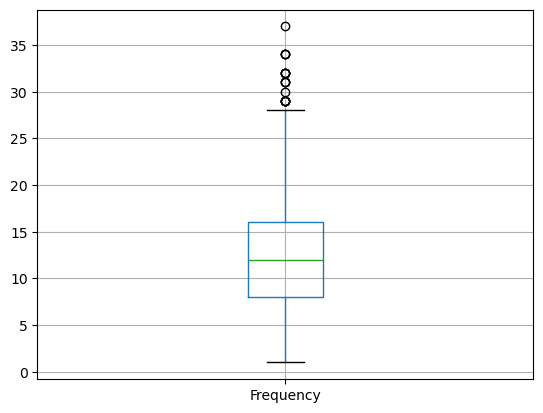

In [16]:
RFMdf.boxplot("Frequency")

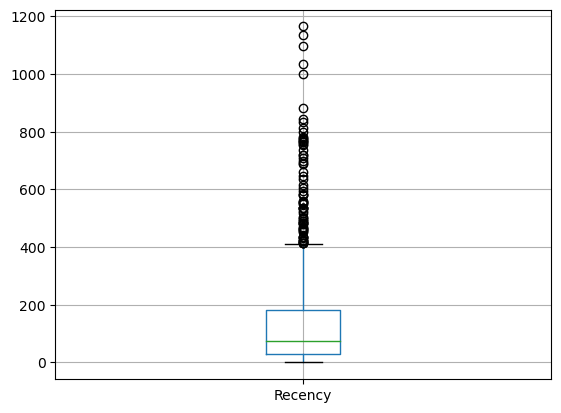

In [17]:
RFMdf.boxplot("Recency")
plt.show()

In [18]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [19]:
RFMdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    793 non-null    int64  
 1   Frequency  793 non-null    int64  
 2   Monetary   793 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 24.8+ KB


In [20]:
df_outlier_removed = remove_outlier_IQR(RFMdf)
df_outlier_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    719 non-null    float64
 1   Frequency  776 non-null    float64
 2   Monetary   750 non-null    float64
dtypes: float64(3)
memory usage: 24.8+ KB


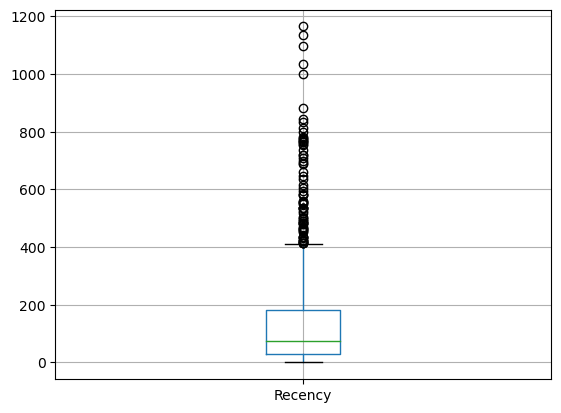

In [21]:
RFMdf.boxplot("Recency")
plt.show()

<AxesSubplot:>

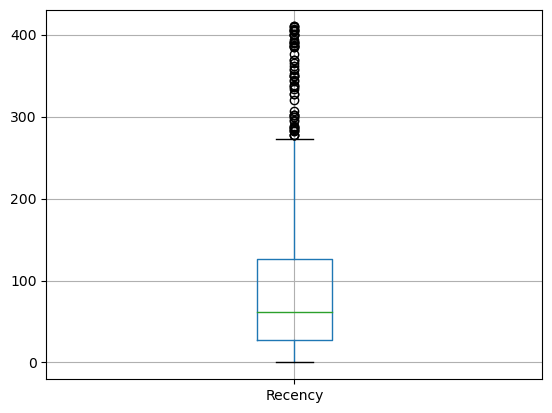

In [25]:
remove_outlier_IQR(RFMdf).boxplot('Recency')

In [34]:
df_outlier_removed

,Recency,Frequency,Monetary
customer_id,,,
AA-10315,184.0,11.0,5563.560
AA-10375,19.0,15.0,1056.390
AA-10480,259.0,12.0,1790.512
AA-10645,55.0,18.0,5086.935
AB-10015,NaN,6.0,886.156
...,...,...,...
XP-21865,43.0,28.0,2374.658
YC-21895,4.0,8.0,5454.350
YS-21880,9.0,12.0,6720.444


<AxesSubplot:>

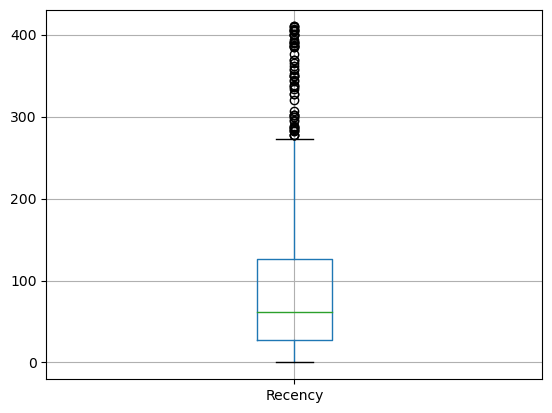

In [35]:
df_outlier_removed.boxplot('Recency')


<AxesSubplot:>

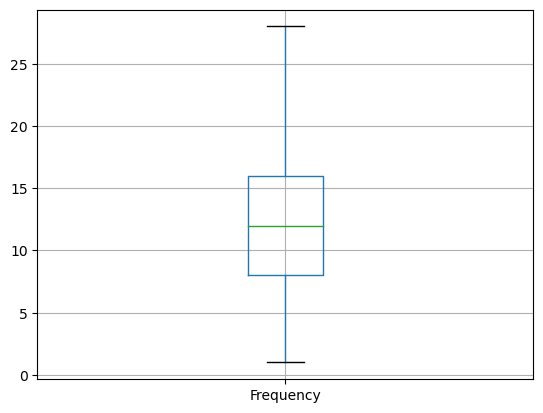

In [26]:
remove_outlier_IQR(RFMdf).boxplot('Frequency')

<AxesSubplot:>

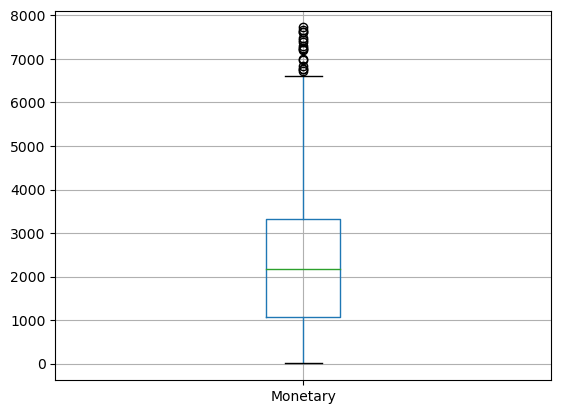

In [28]:
remove_outlier_IQR(RFMdf).boxplot('Monetary')

In [37]:
df_outlier_removed.head()

,Recency,Frequency,Monetary
customer_id,,,
AA-10315,184.0,11.0,5563.560
AA-10375,19.0,15.0,1056.390
AA-10480,259.0,12.0,1790.512
AA-10645,55.0,18.0,5086.935
AB-10015,NaN,6.0,886.156


In [45]:
#feature scaling
# Rescaling the attributes
from sklearn.preprocessing import StandardScaler
df_outlier_removed 

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(df_outlier_removed)
rfm_df_scaled.shape

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,0.871106,-0.211274,1.810334
1,-0.807941,0.499229,-0.809606
2,1.634310,-0.033648,-0.382873
3,-0.441604,1.032107,1.533280
4,NaN,-1.099403,-0.908560


In [57]:
rfm_df_scaled.isnull().sum()

Monetary     74
Frequency    17
Recency      43
dtype: int64

In [46]:
# Builiding the model
 #k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
rfm_df_scaled.isnull()



,Monetary,Frequency,Recency
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,True,False,False
...,...,...,...
788,False,False,False
789,False,False,False
790,False,False,False
791,False,True,True
